# **5.1 Datenvorbereitung - Beispiel 3**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung
* warning abstellen


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.io as io
io.renderers.default='browser'
from scipy import stats
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick über die ersten Zeilen verschaffen

In [2]:
cars = pd.read_csv('CarPrices_miss.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# *Datensatz CarPrices.csv - Metadaten*
---------------------------------------------------

Dieser fiktive Datensatz enthält Informationen zu diversen Automobilmarken, Modellen und deren Eigenschaften. Ziel dieses Übungsdatensatzes besteht in der Untersuchung von Zusammenhängen zwischen den Gebrauchtwagenpreisen (in USD) der Fahrzeuge und deren Eigenschaften.

Quelle: www.kaggle.com

# **Attribute:**

* Typ, Kraftstoffart, Ansaugung, Türanzahl, Karosserie, Antrieb, Motorposition, Radstand, Länge, Breite, Höhe, Leergewicht, Motortyp, Zylinderanzahl, Motorgröße, Kraftstoffsystem, Kompressionsverhältnis, PS, maximale Drehzahl, Verbrauch in Miles per gallon - Stadt, Verbrauch in Miles per gallon - Autobahn, Preis

* Achtung: wir wissen kaum was über die verwendeten Einheiten --> siehe Automaße!

In [3]:
cars.shape

(205, 26)

In [4]:
print(f"Der Datensatz enthält {cars.shape[0]} Reihen und {cars.shape[1]} Spalten.")

Der Datensatz enthält 205 Reihen und 26 Spalten.


Datentypen:
Der Datensatz entält 5 Kategorien-Spalten und 3 numerische Spalten.

In [5]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Noche eine gute Übersicht über den Datensatz bezüglich aller numerischen Angaben - Statistik-Übersicht!

In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [7]:
for col in cars.columns:
    pct_missing = cars[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

car_ID - 0
symboling - 0
CarName - 0
fueltype - 0
aspiration - 0
doornumber - 0
carbody - 0
drivewheel - 0
enginelocation - 44
wheelbase - 0
carlength - 0
carwidth - 0
carheight - 0
curbweight - 0
enginetype - 0
cylindernumber - 0
enginesize - 0
fuelsystem - 0
boreratio - 0
stroke - 0
compressionratio - 0
horsepower - 0
peakrpm - 0
citympg - 0
highwaympg - 0
price - 0


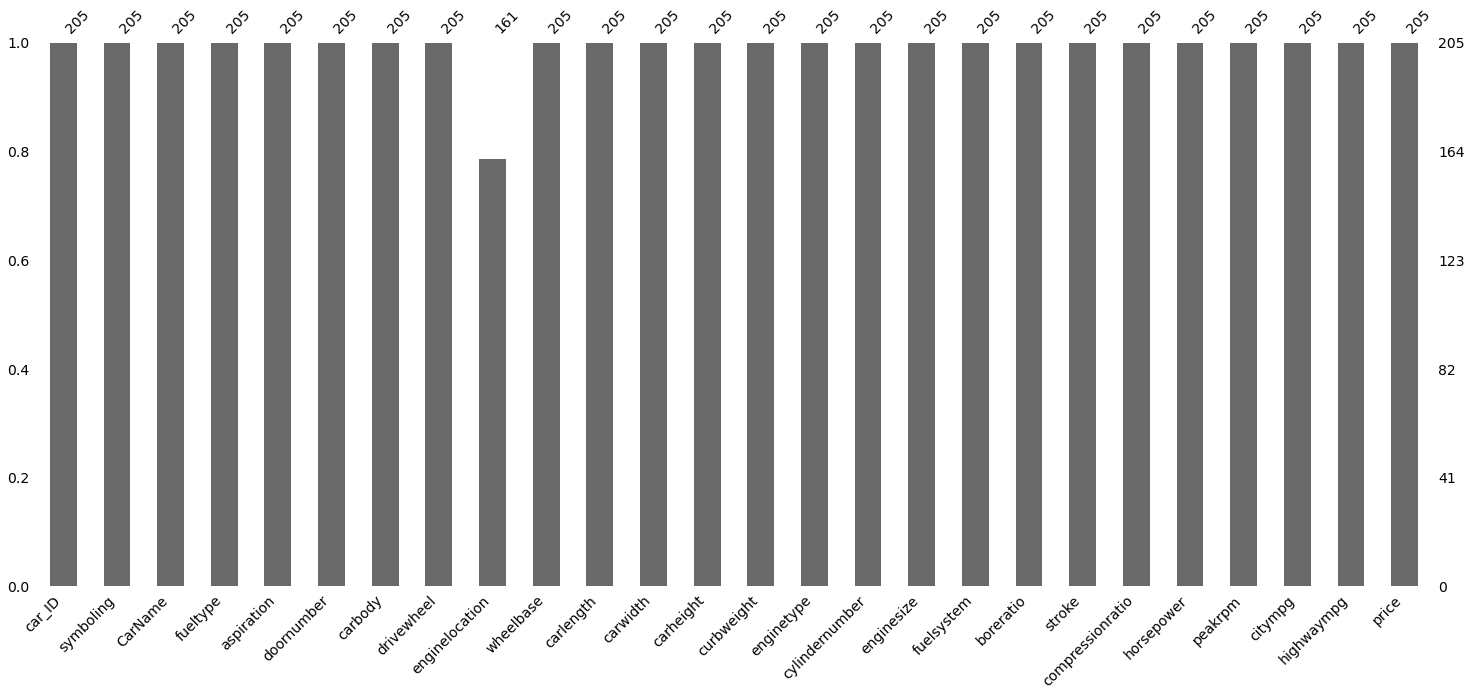

In [8]:
missingno.bar(cars, fontsize = 14)
plt.show()

## d) Duplikate

redundante Datenpunkte finden und entfernen

In [9]:
cars.duplicated().sum()

0

## e) Bereinigen des Datensatzes

* Einträge mit fehlenden Daten entfernen - Achtung! Bei großen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datensätze löschen --> drop_duplicates

In [10]:
# Welche Spalten sind betroffen? Alternative Lösung
incomplete_columns = list(cars.columns[cars.isnull().any()])
incomplete_columns

['enginelocation']

In [11]:
# Wieviel Daten fehlen - Angabe in Prozent? Alternative Lösung
for col in incomplete_columns:
    percent_missing = cars[cars[col].isnull() == True].shape[0] / cars.shape[0] *100
    print("percent missing for column {}: {}".format(col, percent_missing))

percent missing for column enginelocation: 21.463414634146343


**Löschen mit der Function dropna (pandas):** entwickelt für statistische Analysen, die Probleme erzeugen, wenn nicht numerische Einträge in den Zellen stehen (NaN).
Sehr hilfreiches Tool - bietet viele Optionen zur gezielten Entfernung von fehlenden Dateneinträgen

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


Probleme entstehen, wenn sehr viele Einträge fehlen - andere Lösungen suchen!

In [12]:
# Entfernen der Zeilen mit fehlenden Daten - fast ein Viertel der Daten fallen raus!
# Es fehlen aber nur Werte in einer Spalte...
cars2 = cars.dropna()
cars2.shape

(161, 26)



Eine andere Option ist das Auffüllen der fehlenden Werte.

**functions fillna, bfill, ffill**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


In [13]:
cars3 = cars
for col in incomplete_columns:
   cars3[col] = cars[col].fillna('unknown')
cars3.shape

(205, 26)

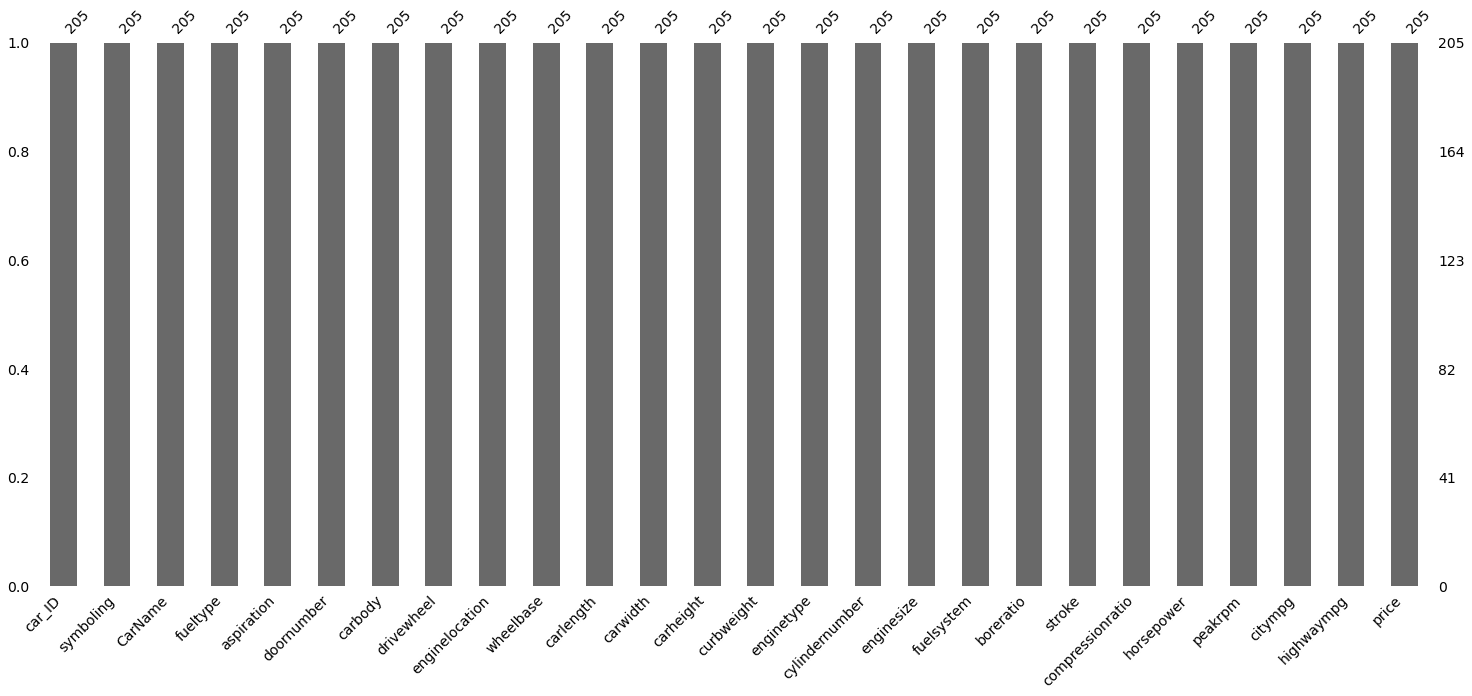

In [14]:
missingno.bar(cars3, fontsize = 14)
plt.show()

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

In [15]:
# Trennen Marke vom Modell
CompanyName = cars3['CarName'].apply(lambda x : x.split(' ')[0])
cars3.insert(3,"CompanyName",CompanyName)
cars3.drop(['CarName'],axis=1,inplace=True)
cars3.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
cars3.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Das sind wohle einige Typos + ähnliche Namen für die gleiche Marke vergeben --> bereinigen!

In [17]:
cars3.CompanyName = cars3.CompanyName.str.lower()

def replace_name(a,b):
    cars3.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars3.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## g) Erste Übersicht visualisieren

* hilfreich zur Bewertung der Datenqualität
* fließender Übergang zur EDA

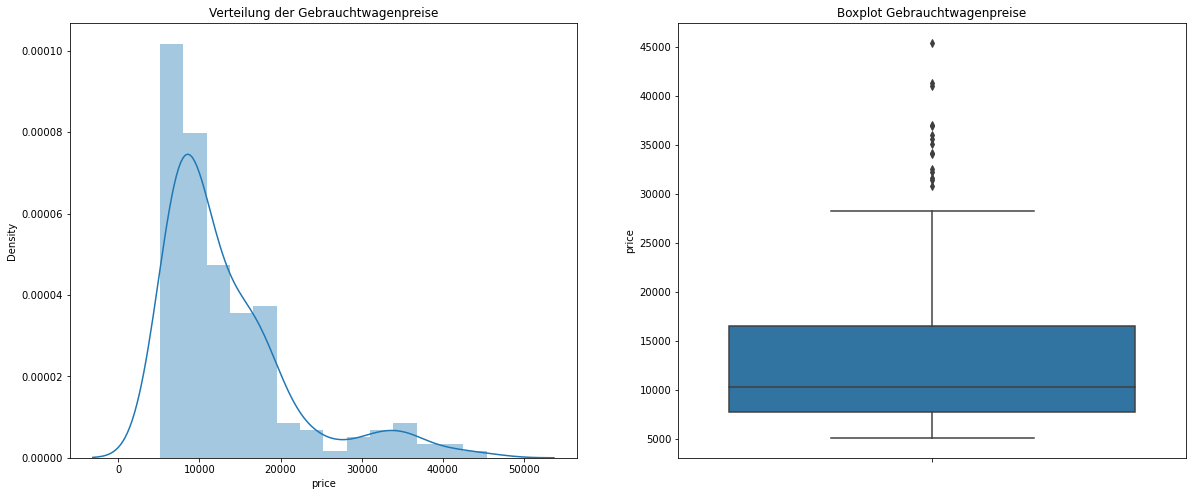

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Verteilung der Gebrauchtwagenpreise')
sns.distplot(cars3.price)

plt.subplot(1,2,2)
plt.title('Boxplot Gebrauchtwagenpreise')
sns.boxplot(y=cars3.price)

plt.show()

# 5.2 EDA

## Was sollte untersucht werden?

1) Stellen Sie eine Verteilung der beteiligten Automarken dar.
2) Ermitteln Sie das Verhältnis Diesel zu Benziner Fahrzeugen und stellen Sie das grafisch dar.
3) Zeigen Sie eine Verteilung der Automarken über deren mittlere Preise. Was sind die teuersten und was die preiswertesten Automarken?
4) Untersuchen Sie die Eigenschaft „Zylinderanzahl“ – welche Kategorien gibt es, wie ist deren Verteilung und wie gestalten sich die Preise in den jeweiligen Kategorien? (Hier kann man Histogramme bzw. Boxplots verwenden.) Interpretieren Sie das Ergebnis!
5) Untersuchen Sie beispielhaft einen möglichen Zusammenhang zwischen Autolänge und Preis und Leergewicht und Preis? Was beobachten Sie?
6) **Welche Merkmale haben signifikanten Einfluss auf den Autopreis? Fassen Sie ihre Ergebnisse kurz zusammen!**

**Wählen Sie eine Grafik aus und gestalten Sie eine Folie: https://docs.google.com/presentation/d/1d9sOwFZhRvVv3qi8C9AKUHzHTnJ8yesI0XjOyWVtPTY/edit?usp=sharing**
